<a href="https://colab.research.google.com/github/ArioZarrin/First/blob/main/GovHack_Tagging_photographic_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tagging photographic images: showcasing the magnificent history of Victoria

## Installation

In [1]:
import io
import requests
import matplotlib.pyplot as plt
from PIL import Image
import torch

In [2]:
!pip install accelerate sentencepiece transformers

In [3]:
from transformers import pipeline
from transformers import LlamaTokenizer, AutoModelForCausalLM
from transformers import AutoProcessor, AutoModelForSeq2SeqLM
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from transformers import AutoTokenizer
from transformers import LlamaForCausalLM

In [4]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Model

https://huggingface.co/nlpconnect/vit-gpt2-image-captioning

In [5]:
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Test Image

In [6]:
import warnings

def custom_warn(*args, **kwargs):
    pass

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Replace the original warnings.warn with the custom function
warnings.warn = custom_warn
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
def extract_metadata(img):
    try:
        metadata = img._getexif()
        metadata_text = None
        if metadata is not None:
            for tag, value in metadata.items():
                metadata_text += f"Tag: {tag}, Value: {value}\n"
            return metadata_text
        else:
            return None
    except Exception as e:
        return f"Error: {e}"

def download_image(url):
  r = requests.get(url, stream=True)
  if r.status_code == 200:
    img = Image.open(io.BytesIO(r.content))
    return img
  return None

def extract_keywords(text):

  # Tokenize the text
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(text.lower())  # Convert to lowercase for consistency

  # Remove stopwords
  filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

  # Perform part-of-speech tagging
  pos_tags = nltk.pos_tag(filtered_tokens)

  # Select nouns and proper nouns (NN, NNS, NNP, NNPS) as keywords
  keywords = [word for word, pos in pos_tags if pos.startswith('NN')]

  return keywords

def image_details(img):

  plt.figure()
  plt.imshow(img)
  plt.show()

  pout = image_to_text(img)
  text = pout[0]['generated_text']
  keywords = extract_keywords(text)
  meta = extract_metadata(img)

  print("Text:", text)
  print("Keywords:", ", ".join(keywords))
  print("Meta:", meta)


In [8]:
urls = [
    'https://live.staticflickr.com/65535/49861149158_538ee62b4c_o_d.jpg',
    'https://live.staticflickr.com/65535/49861149158_538ee62b4c_o_d.jpg',
    'https://live.staticflickr.com/8141/7490821968_190e8836a9_o_d.jpg',
    'https://live.staticflickr.com/65535/49670282043_aaf84c3c09_o_d.jpg',
    'https://live.staticflickr.com/65535/48839543121_f42c8021f3_o_d.jpg',
    'https://live.staticflickr.com/65535/48839545931_1a2eb3b322_o_d.jpg',
    'https://live.staticflickr.com/65535/48639168991_fdcb93e440_o_d.jpg',
    'https://live.staticflickr.com/7843/46509862585_83ec56f752_o_d.jpg',
    'https://live.staticflickr.com/2049/33044466275_d8fef0daf9_o_d.jpg',
    'https://live.staticflickr.com/4816/45380888755_49f8cf0d07_o_d.jpg',
    'https://live.staticflickr.com/7649/27234849070_9fef0b6583_o_d.jpg',
    'https://live.staticflickr.com/605/21427051079_513e77a601_o_d.jpg',
    'https://live.staticflickr.com/5664/21622888951_1f1bf49327_o_d.jpg',
    'https://live.staticflickr.com/620/20801811254_2e8cd6a172_o_d.jpg',
    'https://live.staticflickr.com/5771/21435909501_e3f257d031_o_d.jpg',
    'https://live.staticflickr.com/756/21242935009_d95a813077_o_d.jpg',
    'https://live.staticflickr.com/3930/15238077888_9ae1eb05d8_o_d.jpg',
    'https://live.staticflickr.com/3927/15238128948_eacdb6875d_o_d.jpg',
    'https://live.staticflickr.com/7493/15729662762_7c16fdfbf0_o_d.jpg',
    'https://live.staticflickr.com/3949/15726407921_632af9e172_o_d.jpg',
]

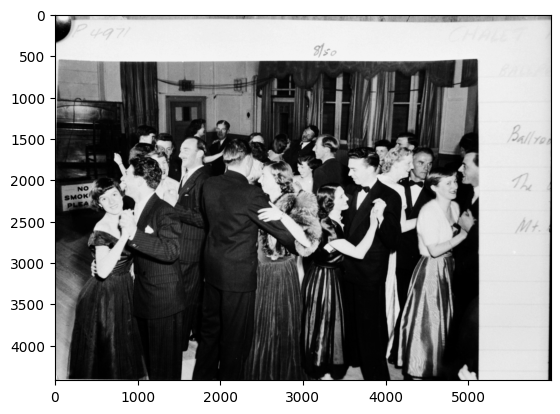

Text: a crowd of people standing around a room 
Keywords: people, room
Meta: None


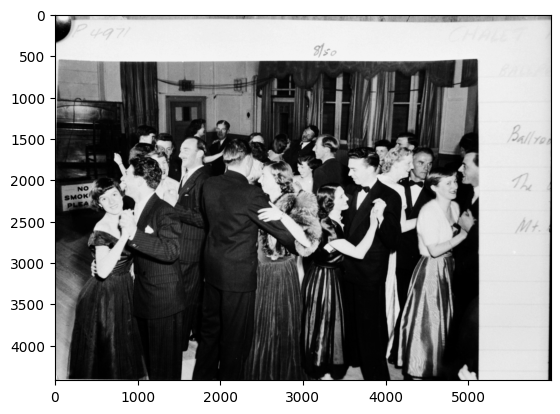

Text: a crowd of people standing around a room 
Keywords: people, room
Meta: None


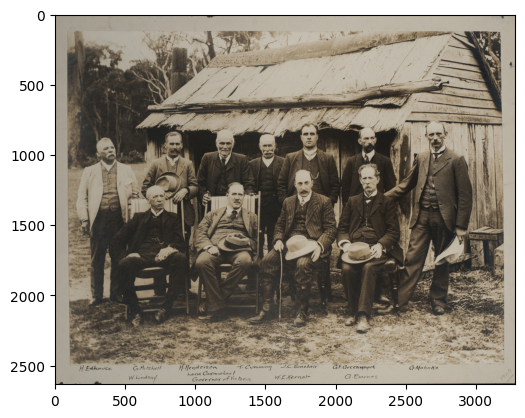

Text: a crowd of people standing around a vintage photo 
Keywords: people, vintage, photo
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


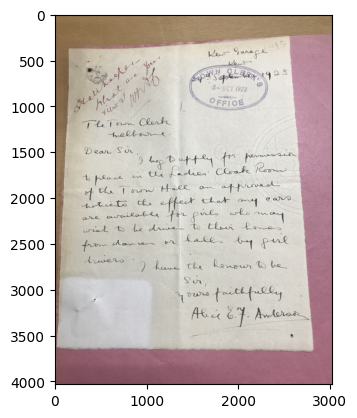

Text: a paper with a picture of a person on it 
Keywords: paper, picture, person
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


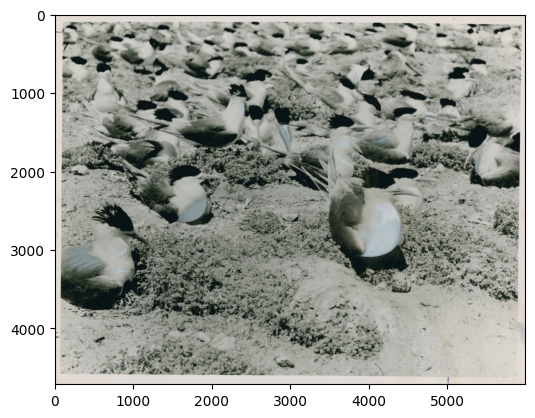

Text: a herd of sheep standing on top of a sandy beach 
Keywords: herd, sandy, beach
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


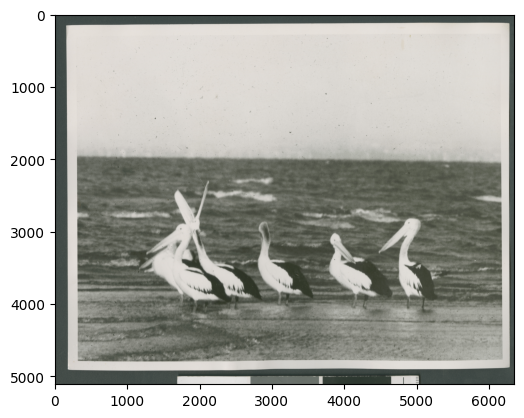

Text: a flock of seagulls are standing on the beach 
Keywords: flock, seagulls, beach
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


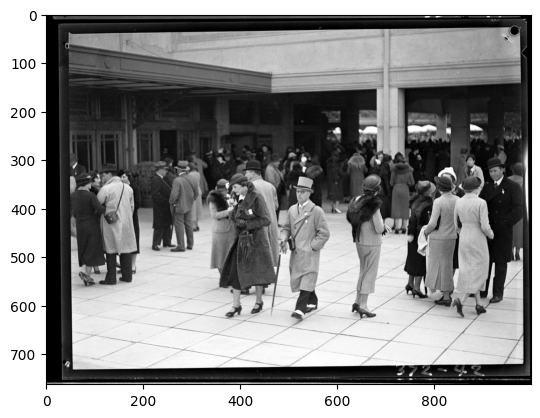

Text: people walking down a sidewalk 
Keywords: people, sidewalk
Meta: None


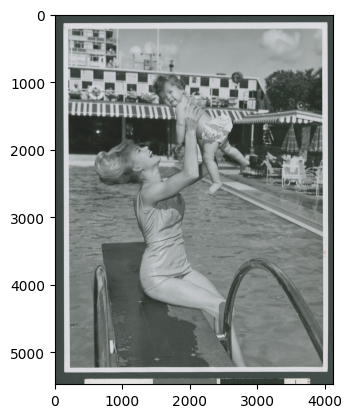

Text: a woman in a bikini is on a boat 
Keywords: woman, boat
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


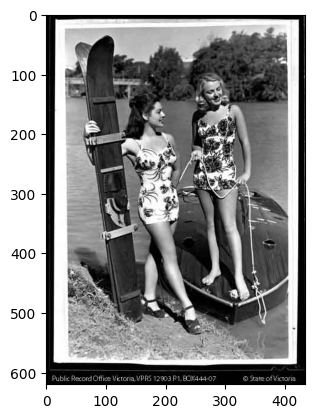

Text: a woman and a child on a surfboard 
Keywords: woman, surfboard
Meta: None


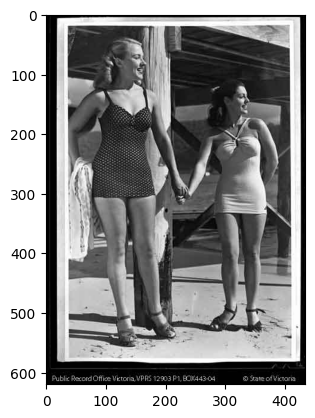

Text: a woman and a man are walking down the street 
Keywords: woman, man, street
Meta: None


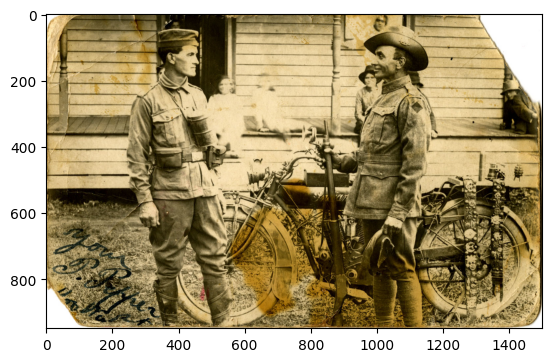

Text: a man and woman standing next to a bicycle 
Keywords: man, woman, bicycle
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


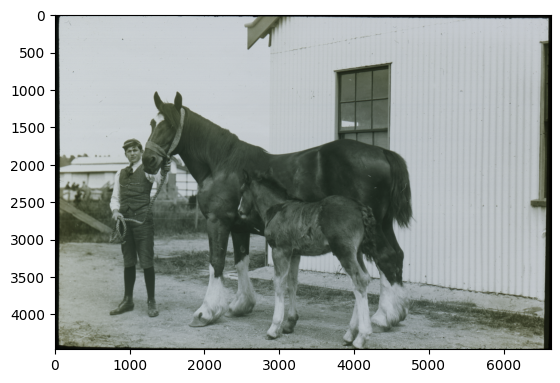

Text: a man and a horse standing next to each other 
Keywords: man, horse
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


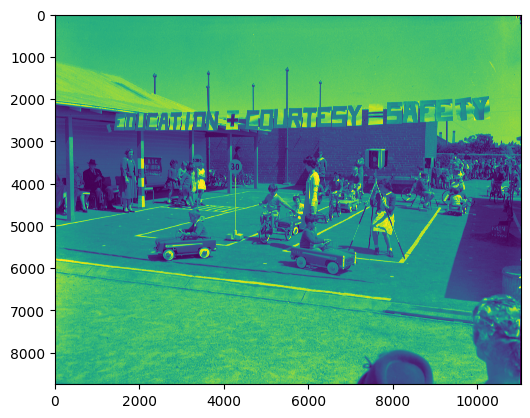

Text: a street scene with a man on a motorcycle 
Keywords: street, scene, man, motorcycle
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


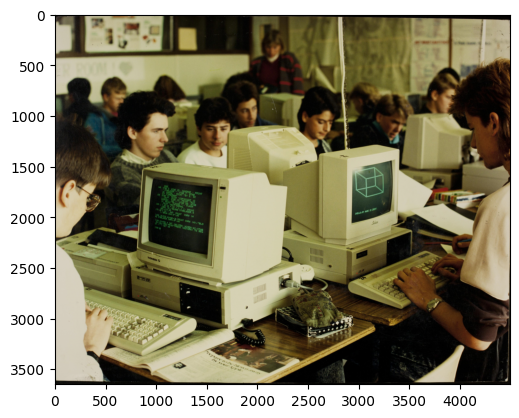

Text: a room full of people working on computers 
Keywords: room, people, computers
Meta: None


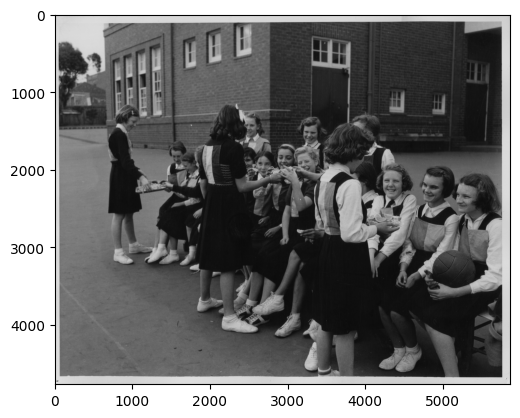

Text: a large group of people sitting on a sidewalk 
Keywords: group, people, sidewalk
Meta: None


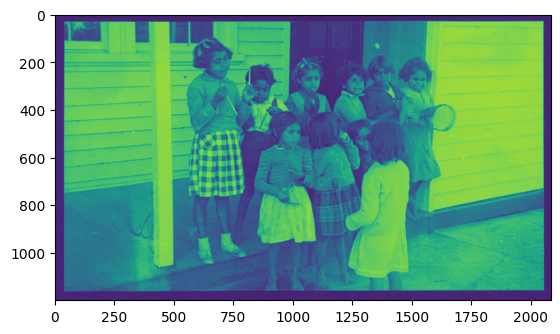

Text: a group of girls posing for a picture 
Keywords: group, girls, picture
Meta: None


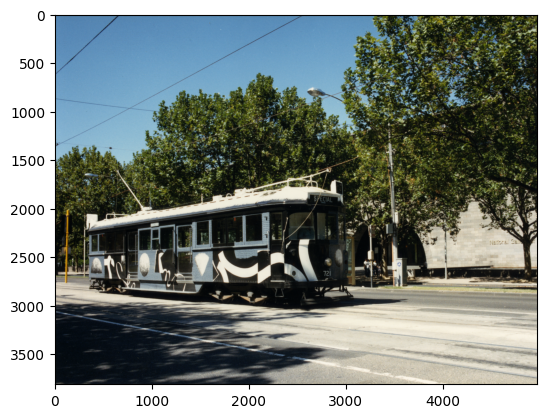

Text: a white and blue bus on a street 
Keywords: blue, bus, street
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


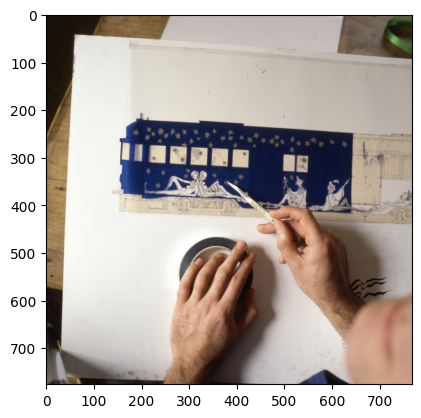

Text: a person is cutting a paper with a drawing board 
Keywords: person, paper, board
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


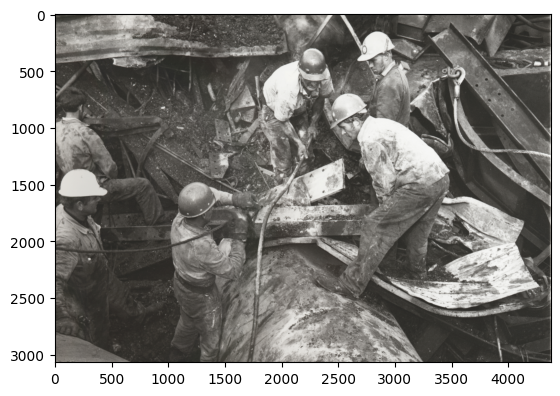

Text: a number of men in fatigues and hats 
Keywords: number, men, fatigues, hats
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


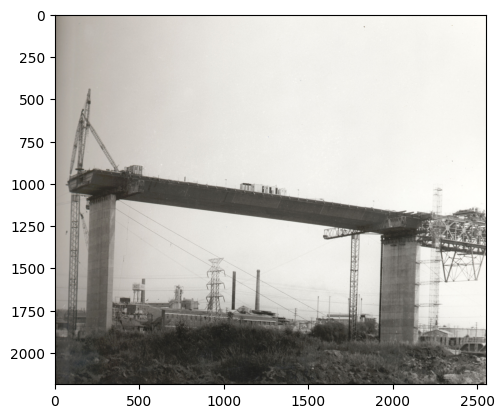

Text: a train crossing a bridge over a river 
Keywords: train, bridge, river
Meta: Error: unsupported operand type(s) for +=: 'NoneType' and 'str'


In [9]:
downloaded_images = list(map(lambda url: download_image(url), urls))

_ = list(map(lambda img: image_details(img), downloaded_images))

##Future Works

###Using Chatbot to communice with user.

###Generating Artificial Tags

Orginal private repo: https://huggingface.co/blog/llama2

public repo: https://huggingface.co/daryl149/llama-2-7b-chat-hf

Mini Llama2
https://huggingface.co/openlm-research/open_llama_3b_v2

In [10]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root

In [11]:
# Get the current device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Current device:", device)
gpu = 'cuda:0'

Current device: cuda


In [12]:
## v2 models
model_path = 'openlm-research/open_llama_3b_v2'
# model_path = 'openlm-research/open_llama_7b_v2'

## v1 models
# model_path = 'openlm-research/open_llama_3b'
# model_path = 'openlm-research/open_llama_7b'
# model_path = 'openlm-research/open_llama_13b'

tokenizer = LlamaTokenizer.from_pretrained(model_path)

model = LlamaForCausalLM.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    device_map='auto', #auto
)

You are using the legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


In [13]:
prompt = """
Explain where situation has happend?
situation: 'A baby fox playing with a baby bunny'.
"""

input_ids = tokenizer(prompt, return_tensors="pt").input_ids

generation_output = model.generate(
    input_ids=input_ids.to('cuda'), max_new_tokens=64
)

result = tokenizer.decode(generation_output[0])

In [14]:
print(result)

<s>
Explain where situation has happend?
situation: 'A baby fox playing with a baby bunny'.
I'm not sure if I'm using the right words.
I'm not sure if I'm using the right words.
by
Melissa1985
asked 2 years ago
I think you're using the right words, but I'm not sure if
